<a href="https://colab.research.google.com/github/HolyMuchii/ProcesamientoImagenesTPs/blob/main/TP8/TP8_Murilo_Alves_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Último TP a Implementar (TP8):

Implementar un aplicativo que permita abrir una imagen y con esta obtener:
* Downsampling X2 (mostrando la imagen resultado al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.
- Upsampling X2 (mostrando la imagen original al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.
- Cuantización a cantidad de niveles de gris variable, utilizando uniforme, dithering aleatorio, y difusión del error por scan-line.

Todas las funciones de Downsamplig, Upsampling y Cuantización deben ser desarrolladas como funciones propias y NO con funciones de biblioteca. Les sugiero recorrer la imagen mediante ciclos for anidados para una fácil implementación.

Fecha de entrega: 08 de Dicembre.

In [1]:
!git clone https://github.com/HolyMuchii/ProcesamientoImagenesTPs.git

Cloning into 'ProcesamientoImagenesTPs'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 82 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (82/82), done.


In [2]:
import imageio as io
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [26]:
def image_to_rgb(image):
  r=image[:,:,0]
  g=image[:,:,1]
  b=image[:,:,2]
  return r,g,b

def rgb_to_y(r,g,b):
  y=(0.299*r + 0.587*g + 0.114*b)/255
  np.clip(y,0,1)
  return y

def upsamplingX2(image):
  images=np.zeros((image.shape[0]*2,image.shape[1]*2))
  ind2 = 0
  images2=images.copy()
  for i in range(image.shape[0]):
    images[ind2,0:int(image.shape[1])]=image[i]
    images[ind2+1,0:int(image.shape[1])]=image[i]
    ind2 = ind2+2
  ind2 = 0
  for j in range(image.shape[1]):
    images2[:,ind2]=images[:,j]
    images2[:,ind2+1]=images[:,j]
    ind2 = ind2+2
  plt.imshow(images2,'gray')
  return images2

def downsamplingX2(image):
  if image.shape[0] %2 == 0:
    image = image
  else:
   image2=np.zeros((image.shape[0]+1,image.shape[1]))
   image2[0:image.shape[0],:]=image[:,:]
   image2[image.shape[0],:]=image[image.shape[0]-1,:]
   image=image2
   
  if image.shape[1] %2 == 0:
    image = image
  else:
   image2=np.zeros((image.shape[0],image.shape[1]+1))
   image2[:,0:image.shape[1]]=image[:,:]
   image2[:,image.shape[1]]=image[:,image.shape[1]-1]
   image=image2

  kernel = np.array([[1,0],[0,0]])
  m=kernel.shape[0]
  n=kernel.shape[1]
  imagek = np.zeros((int(image.shape[0]/m),int(image.shape[1]/n)))
  ind2=0
  for i in range(int(image.shape[0]/m)):
    ind=0
    for j in range(int(image.shape[1]/n)):
      imagesize=image[ind2:ind2+kernel.shape[0],ind:ind+kernel.shape[1]]
      ind=ind+n
      t = np.sum(kernel*imagesize)
      imagek[i,j]=t
    ind2=ind2+m
  return imagek

# Estratégia: Os quadrados se limitavam à borda, então adicionei uma linha e coluna extra para realizar as contas e retirei elas no final 
def upsamplingX2_mean(image):
  image2=np.zeros((image.shape[0]+1,image.shape[1]+1))
  image2[0:image.shape[0],:-1]=image[:,:]
  image2[image.shape[0],:-1]=image[image.shape[0]-1,:]
  image2[:,image.shape[1]]=image2[:,image.shape[1]-1]
  ind=0
  sub=np.zeros((2,2))
  imagek=np.zeros((image2.shape[0]*2-2,image2.shape[1]*2-2))
  for i in range(int(image2.shape[0]-1)):
    ind2=0
    for j in range(int(image2.shape[1]-1)):
      imagesize=image2[i:i+2,j:j+2]
      sub[0,0]=imagesize[0,0]
      sub[0,1]=(imagesize[0,0]+imagesize[0,1])/2 
      sub[1,0]=(imagesize[0,0]+imagesize[1,0])/2
      sub[1,1]=(imagesize[0,0]+imagesize[0,1]+imagesize[1,0]+imagesize[1,1])/4
      imagek[ind:ind+2,ind2:ind2+2]=sub[:,:]
      ind2=ind2+2
    ind=ind+2
  imagek=imagek[:-1,:-1]
  return imagek


def downsamplingX2_mean(image):
  if image.shape[0] %2 == 0:
    image = image
  else:
   image2=np.zeros((image.shape[0]+1,image.shape[1]))
   image2[0:image.shape[0],:]=image[:,:]
   image2[image.shape[0],:]=image[image.shape[0]-1,:]
   image=image2
   
  if image.shape[1] %2 == 0:
    image = image
  else:
   image2=np.zeros((image.shape[0],image.shape[1]+1))
   image2[:,0:image.shape[1]]=image[:,:]
   image2[:,image.shape[1]]=image[:,image.shape[1]-1]
   image=image2

  kernel = np.array([[0.25,0.25],[0.25,0.25]])
  m=kernel.shape[0]
  n=kernel.shape[1]
  imagek = np.zeros((int(image.shape[0]/m),int(image.shape[1]/n)))
  ind2=0
  for i in range(int(image.shape[0]/m)):
    ind=0
    for j in range(int(image.shape[1]/n)):
      imagesize=image[ind2:ind2+kernel.shape[0],ind:ind+kernel.shape[1]]
      ind=ind+n
      t = np.sum(kernel*imagesize)
      imagek[i,j]=t
    ind2=ind2+m
  return imagek



def upsamplingX2_cubic(image):
  if image.shape[0] %2 == 0:
    image = image
  else:
    image1=np.zeros((image.shape[0]+1,image.shape[1]))
    image1[0:image.shape[0],:]=image[:,:]
    image1[image.shape[0],:]=image[image.shape[0]-1,:]
    image=image1

  if image.shape[1] %2 == 0:
    image = image
  else:
    image1=np.zeros((image.shape[0],image.shape[1]+1))
    image1[:,0:image.shape[1]]=image[:,:]
    image1[:,image.shape[1]]=image[:,image.shape[1]-1]
    image=image1

  image2=np.zeros((image.shape[0]+2,image.shape[1]+2))
  image2[0:image.shape[0],:-2]=image[:,:]
  image2[image.shape[0]:image.shape[0]+2,:-2]=image[image.shape[0]-1,:]
  image2[:,image.shape[1]]=image2[:,image.shape[1]-1]
  image2[:,image.shape[1]+1]=image2[:,image.shape[1]-1]

  ind=0
  indd=0
  imagek=np.zeros((int(image2.shape[0]+image2.shape[0]/2-1),int(image2.shape[1]+image2.shape[1]/2-1)))
  for i in range(int(image2.shape[0]/2-1)):
    ind2=0
    indd2=0
    for j in range(int(image2.shape[1]/2-1)):
      imagesize=image2[ind:ind+4,ind2:ind2+4]
      sub=np.zeros((3,3))
      sub[0,0:2]=imagesize[0,0:2]
      sub[0,2]=((-1/8)*imagesize[0,0]+(5/8)*imagesize[0,1]+(5/8)*imagesize[0,2]+(-1/8)*imagesize[0,3])
      sub[1,0:2]=imagesize[1,0:2]
      sub[1,2]=((-1/8)*imagesize[1,0]+(5/8)*imagesize[1,1]+(5/8)*imagesize[1,2]+(-1/8)*imagesize[1,3])
      sub[2,0]=((-1/8)*imagesize[0,0]+(5/8)*imagesize[1,0]+(5/8)*imagesize[2,0]+(-1/8)*imagesize[3,0])
      sub[2,1]=((-1/8)*imagesize[0,1]+(5/8)*imagesize[1,1]+(5/8)*imagesize[2,1]+(-1/8)*imagesize[3,1])
      a = ((-1/8)*imagesize[0,2]+(5/8)*imagesize[1,2]+(5/8)*imagesize[2,2]+(-1/8)*imagesize[3,2])
      b = ((-1/8)*imagesize[0,3]+(5/8)*imagesize[1,3]+(5/8)*imagesize[2,3]+(-1/8)*imagesize[3,3])
      sub[2,2]=((-1/8)*sub[2,0]+(5/8)*sub[2,1]+(5/8)*a+(-1/8)*b)
      imagek[indd:indd+3,indd2:indd2+3]=sub[:,:]
      ind2=ind2+2
      indd2=indd2+3
    ind=ind+2
    indd=indd+3

  imagek=imagek[0:imagek.shape[0]-2,0:imagek.shape[1]-2]
  return imagek


def uniform_quantization(image,k):
  n=k-1
  delta = 1/n
  lim=np.zeros((n+1))
  lim2=np.zeros((n+2))
  ind=1
  for i in range(n+1):
    lim[i]=(i*delta)
    lim2[i+1]=ind*delta/2
    ind=ind+2
    
    imagek=image.copy()
    
  for m in range(imagek.shape[0]):
    for n in range(imagek.shape[1]):
      ind=1
      for j in range(lim2.shape[0]-1): 
        if imagek[m,n] <= lim2[ind]:
          if imagek[m,n] > lim2[ind-1]:
            imagek[m,n] = lim[j]
          else:
            oi=1
        else:
          oi=1
        ind=ind+1
  return imagek
    

def dithering_quantization(image):
  kernel = np.array([[0.25,0.50],[0.75,0]])
  imagek = np.zeros((image.shape[0],image.shape[1]))
  ind2=0
  for i in range(int(image.shape[0]/kernel.shape[0])):
    ind=0
    for j in range(int(image.shape[1]/kernel.shape[1])):
      imagesize = image[ind2:ind2+kernel.shape[0],ind:ind+kernel.shape[1]]
      for m in range(kernel.shape[0]):
        for n in range(kernel.shape[1]):
          if imagesize[m,n] > kernel[m,n]:
            imagek[ind2,ind] = 1
          else:
            imagek[ind2,ind] = 0
      ind=ind+2
    ind2=ind2+2
  return imagek


def erro_diffusion_dithering_quantization(image):
  image2=np.zeros((image.shape[0]+1,image.shape[1]+2))
  image2[:image.shape[0],1:image.shape[1]+1]=image[:,:]
  imagek=np.zeros((image.shape[0]+1,image.shape[1]+2))
  
  for i in range(image.shape[0]):
    ind=1
    for j in range(image.shape[1]):
      if image2[i,ind] <= 0.5:
        erro = image2[i,ind]
        imagek[i,ind] = 0
        image2[i,ind+1] = (7/16)*erro + image2[i,ind+1]
        image2[i+1,ind+1] = (1/16)*erro + image2[i+1,ind+1]
        image2[i+1,ind] = (5/16)*erro + image2[i+1,ind]
        image2[i+1,ind-1] = (3/16)*erro + image2[i+1,ind-1]
      else:
        erro = image2[i,ind] - 1
        imagek[i,ind] = 1
        image2[i,ind+1] = (7/16)*erro + image2[i,ind+1]
        image2[i+1,ind+1] = (1/16)*erro + image2[i+1,ind+1]
        image2[i+1,ind] = (5/16)*erro + image2[i+1,ind]
        image2[i+1,ind-1] = (3/16)*erro + image2[i+1,ind-1]
      ind=ind+1
  imagek=imagek[:image.shape[0],1:image.shape[1]+1]
  return imagek

(-0.5, 5183.5, 3455.5, -0.5)

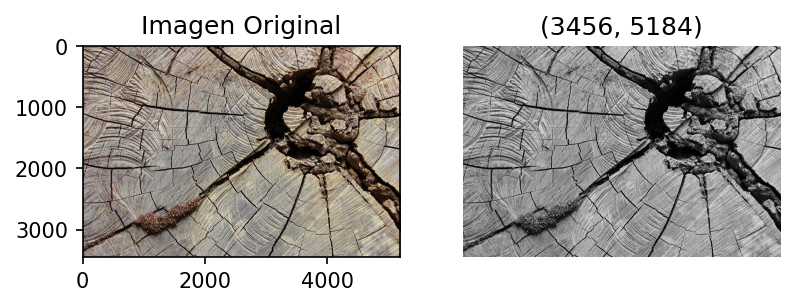

In [36]:
# Imagen Original

image01 = io.imread('ProcesamientoImagenesTPs/IMG_2766.JPG')
r,g,b=image_to_rgb(image01)
y=rgb_to_y(r,g,b)

fig,ax = plt.subplots(1,2, dpi=150)
ax[0].imshow(image01,'gray')
ax[0].set_title('Imagen Original')
ax[1].imshow(y,'gray')
ax[1].set_title(y.shape)
ax[1].axis('off')

## Técnicas de remuestreo: reconstrucción, cuantificación y compresión

### Downsampling X2 - Constante, Bilineal y Bicúbico.

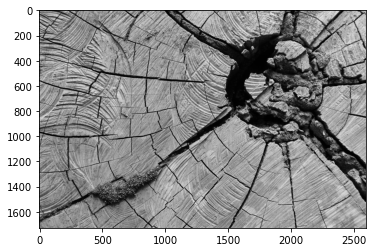

In [ ]:
# Downsampling X2 - Reducir sistemáticamente a la mitad la cantidad de píxeles

yd=downsamplingX2(y)
plt.imshow(yd,'gray')

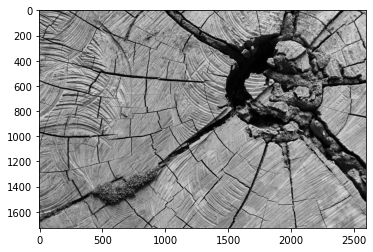

In [ ]:
# DonwsamplingX2 Medio - Promedio de un conjunto de 4 píxeles sistemáticamente en la imagen

ydm = downsamplingX2_mean(y)
plt.imshow(ydm,'gray')

In [ ]:
 # downsamplingX2_cubic 

### Upsampling X2 - Constante, Bilineal y Bicúbico.

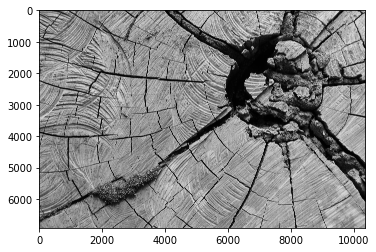

In [29]:
# UpsamplingX2 - Píxeles Duplicados

yu=upsamplingX2(y)
plt.imshow(yu,'gray')

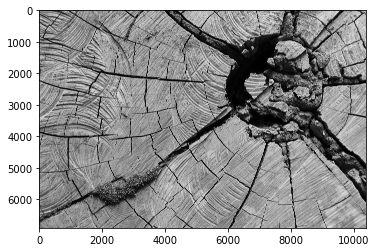

In [27]:
# UpsamplingX2 Medio - Agrega píxeles de valores promedio entre los píxeles originales

yum = upsamplingX2_mean(y)
plt.imshow(yum,'gray')

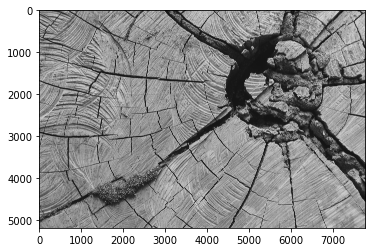

In [ ]:
# UpsamplingX2 bicúbico - Valores cúbicos de fila y columna por cada 2 píxeles originales de la imagen. La regla es usar 4 valores de fila para crear el valor cúbico de la fila y 4 valores de columna para crear el valor cúbico de la columna (el centro puede ser una de dos reglas)

yuc = upsamplingX2_cubic(y)
plt.imshow(yuc,'gray')

### Cuantización - Uniforme, Dithering Aleatorio y Difusión del Error

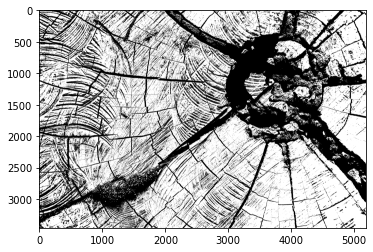

In [ ]:
# Cuantización Uniforme - Divide los píxeles en grupos de valores fijos, el número de grupos se puede variar

yuq = uniform_quantization(y,2)
plt.imshow(yuq,'gray')

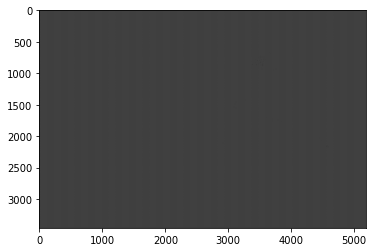

In [38]:
# Cuantización Dithering - Selecciona píxeles para recibir valores de 1 o 0, dependiente del kernel 2X2. Esta técnica solo funciona en imágenes en las que puede ver píxeles individuales

ydq = dithering_quantization(y)
plt.imshow(ydq,'gray')

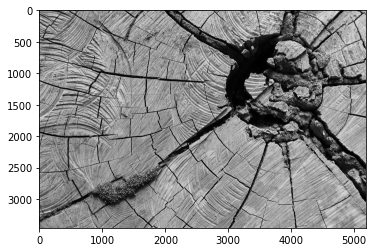

In [23]:
# Cuantización Erro Diffusion Dithering - Técnica que asigna valores de 0 o 1 a los píxeles, pero con un sistema de compensación para los píxeles vecinos.

yeddq = erro_diffusion_dithering_quantization(y)
plt.imshow(yeddq,'gray')

--------------------------

## Análisis de resultados:

**Imagen utilizada:** Imagen, con gran cantidad de píxeles (3456 x 5184), de un tronco de madera con una superficie irregular y degradada - 

**Imagen trabajada en un sistema:** Técnicas de remuestreo

Todo el *Upsampling y Downsamplings* utilizado no presentaba distorsiones visibles.

La *Cuantificación del Dithering Aleatorio* no obtuvo resultados satisfactorios en comparación con los demás. Requiere la técnica de reducción de resolución, reduciendo el número de píxeles, para obtener mejores resultados.

El uso de la cuantificación *Error Diffusion Dithering* obtuvo resultados satisfactorios, con la aparición de definiciones de imagen formadas por valores de 0 y 1 en forma no segregada igual a *Dithering Uniform*

La mejor técnica de remuestreo para ser utilizada como detector de superficies irregulares es el *Dithering Uniform*